In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Dependencies
from pymongo import MongoClient
import os
import pandas as pd
import numpy as np
import missingno
from datetime import datetime

from urls_list import * #where all urls and paths are saved
from config import *

### Check DB for any duplicate rental IDs

In [28]:
def checkSanity(collection, pk):
    client = MongoClient(db_connection_string)
    
    records = list(client.ETLInsights[collection].find({}, {pk:1, '_id':0}))
    total_unique_records = len(set(post[pk] for post in records))
    total_records = client.ETLInsights[collection].count_documents({})
    print(f"Total records: {total_records}")
    print(f"Total uniique records: {total_unique_records}")
    if(total_unique_records == total_records):
        print(f"{collection} is sane")
    else:
        print(f"Sanity check failed for {collection}")
    client.close()

In [29]:
checkSanity("HistoricRental", "id")

Total records: 3315
Total uniique records: 3315
HistoricRental is sane


In [30]:
checkSanity("CurrentRental", "id")

Total records: 2938
Total uniique records: 2938
CurrentRental is sane


### Insert Kijiji Data to the HistoricRental DB

In [34]:
Kijiji = pd.read_csv(os.path.join('..', 'Data', 'kijiji_rental_final.csv'))

In [80]:
# client = MongoClient(db_connection_string)
# client.ETLInsights.HistoricRental.insert_many(Kijiji.T.to_dict().values())
# client.close()

In [38]:
checkSanity("HistoricRental", "id")

Total records: 3837
Total uniique records: 3837
HistoricRental is sane


### Insert Community assets Data in DB

In [76]:
Community_Assets = pd.read_csv(os.path.join('..', 'Data', 'community_assets_with_cooridnates.csv'))

(array([], dtype=int64),)

(array([], dtype=int64),)

service_name service_name_2
0              Child and Family Services Review Board            NaN
1                                Custody Review Board            NaN
2                    Social Justice Tribunals Ontario            NaN
3            Anita Ekstein Holocaust Resource Library            NaN
4                     Alexandra Park Community Centre            NaN
...                                               ...            ...
2675                                   Prosper Canada            NaN
2676                         Al Green Resource Centre            NaN
2677  CARE Centre for Internationally Educated Nurses            NaN
2678                     Canadian Safe School Network            NaN
2679                         Ability Learning Network            NaN

[2680 rows x 2 columns]

(array([], dtype=int64),)

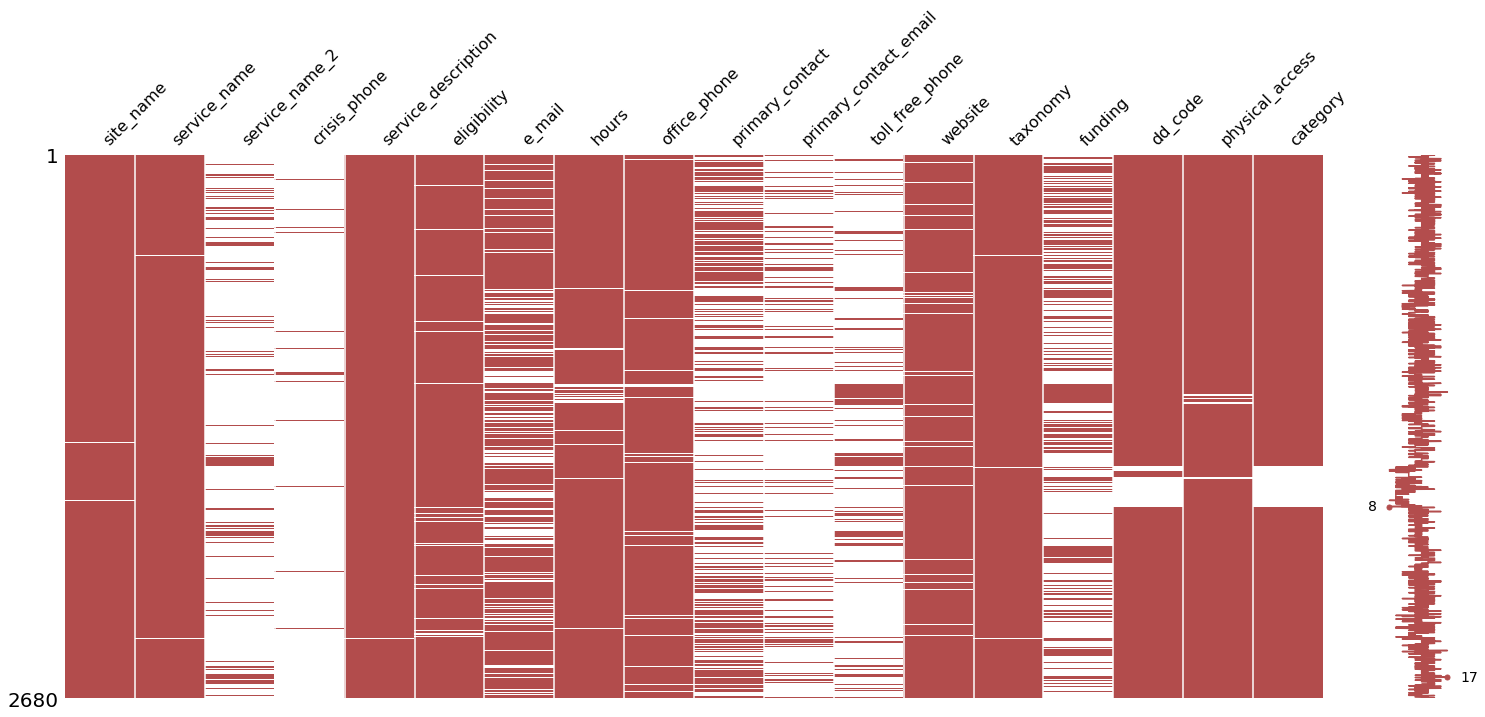

In [77]:
np.where(Community_Assets['id']!=Community_Assets['id.1'])
np.where(Community_Assets['address']!=Community_Assets['address.1'])
Community_Assets[['service_name','service_name_2']] 

#Cleaunp
Community_Assets.drop(['id', 'id.1', 'address.1'], axis=1, inplace=True) #id is not in order; 'id.1', 'address.1' are repeated
Community_Assets.reset_index(inplace=True)
Community_Assets.rename(columns={"index":"id"}, inplace=True)


#Check for nan
missingdata_cols = Community_Assets.columns[Community_Assets.isnull().any()].to_list()
#visualize nan
_=missingno.matrix(Community_Assets[missingdata_cols], color=(0.7,0.3,0.3))
np.where(Community_Assets.duplicated()) #No rows are duplicated

In [79]:
# client = MongoClient(db_connection_string)
# client.ETLInsights.CommunityAssets.insert_many(Community_Assets.T.to_dict().values())
# client.close()

In [81]:
checkSanity("CommunityAssets", "id")

Total records: 2680
Total uniique records: 2680
CommunityAssets is sane


### Insert Crime Data in DB

In [120]:
#Crime is from 2019 Jan 01 onwards
Crime = pd.read_csv(os.path.join('..', 'Data', 'Crime.csv'))
np.where(Crime.duplicated()) #No rows are duplicated
#CrimeLastSixMonths is from 2019 June 01 onwards
CrimeLastSixMonths = Crime[Crime['occurrencedate'].map(lambda x: datetime.strptime(x, "%Y-%m-%d")>=datetime.strptime('2019-06-01', "%Y-%m-%d"))].copy()   
CrimeLastSixMonths.drop(['id'], axis=1, inplace=True)
CrimeLastSixMonths.reset_index(drop=True, inplace=True)
CrimeLastSixMonths.reset_index(inplace=True)
CrimeLastSixMonths.rename(columns={"index":"id"}, inplace=True)

(array([], dtype=int64),)

In [125]:
# client = MongoClient(db_connection_string)
# client.ETLInsights.Crime.insert_many(Crime.T.to_dict().values())
# client.ETLInsights.CrimeLastSixMonths.insert_many(CrimeLastSixMonths.T.to_dict().values())
# client.close()

In [126]:
checkSanity("Crime", "id")

Total records: 37752
Total uniique records: 37752
Crime is sane


In [127]:
checkSanity("CrimeLastSixMonths", "id")

Total records: 22949
Total uniique records: 22949
CrimeLastSixMonths is sane


### Insert Income Data in DB

In [128]:
FSA_Avg_Income = pd.read_csv(os.path.join('..', 'Data', 'FSA_Avg_Income.csv'))

In [136]:
# client = MongoClient(db_connection_string)
# client.ETLInsights.FSAIncome.insert_many(FSA_Avg_Income.T.to_dict().values())
# client.close()

In [137]:
checkSanity("FSAIncome", "FSA")

Total records: 197
Total uniique records: 197
FSAIncome is sane


### Type cast price to int

In [ ]:
# client = MongoClient(db_connection_string)
# client.ETLInsights.FSAIncome.insert_many(FSA_Avg_Income.T.to_dict().values())
# client.close()



In [3]:
client = MongoClient(db_connection_string)
client.ETLInsights.Crime.distinct("MCI")

['Assault',
 'Auto Theft',
 'Break and Enter',
 'Homicide',
 'Robbery',
 'Theft Over']